# Decision Trees and Different Metrics

In this lecture we are going to look at <i>decision tree models</i>. We will learn how to train and use such models, and how to visualize the decision trees. When we are doing binary classification, we will also introduce precision and recall.

<b>Functions and attributes in this lecture: </b>
- `sklearn.tree` - Submodule for dealing with trees
 - `DecisionTreeClassifier` - Decision tree model for classification problems
 - `DecisionTreeRegressor` - Decision tree model for regression problems
 - `plot_tree` - Use this for plotting the tree
- `sklearn.metrics` - Submodule containing metrics
 - `precision_score` - Calculates the precision score
 - `recall_score` - Calculates the recall score

In [256]:
# Non-sklearn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [257]:
# Importing the breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Geting the data and targets, target already binary output format. 
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

# Divide into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Printing out description of the dataset
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Decision Tree Model

In [258]:
# Importing the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

In [259]:
# Initializing a decision tree classifier
tree_model = DecisionTreeClassifier(max_leaf_nodes=5, max_depth=2)

In [260]:
# Fitting the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5)

In [261]:
# Importing the plott tree function
from sklearn.tree import plot_tree

[]

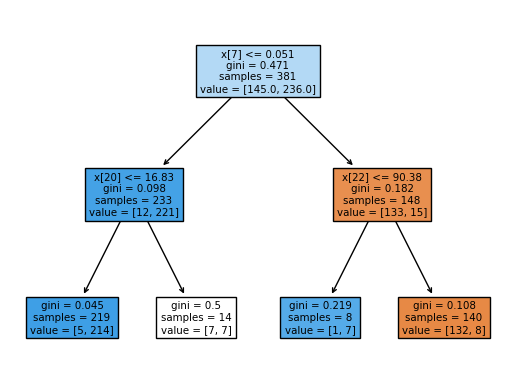

In [262]:
# Plot the tree
plot_tree(tree_model, filled=True)
plt.plot()

In [263]:
# Calculate the accuracy score
y_pred = tree_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.925531914893617

## Precision and recall
| Result         | Predicted Target | Actual target |
| ---------------| -----------------|---------------|
| True Positive  | 1                |  1            |
| True Negative  | 0                |  0            |
| False Positive | 1                |  0            |
| False Negative | 0                |  1            |

In [264]:
# Find false positives
fp = y_pred[y_pred!=y_test]==1
sum(fp)

2

In [265]:
# Find false negatives
fn = y_pred[y_pred!=y_test]==0
sum(fn)

12

In [266]:
# Import the precision and recall metrics
from sklearn.metrics import precision_score, recall_score

In [267]:
# Finding the precision score
precision_score(y_test, y_pred)

0.9819819819819819

In [268]:
# Finding the recall score
recall_score(y_test, y_pred)

0.9008264462809917

In [269]:
# Weight the different classes differently
tree_model_weighted = DecisionTreeClassifier(max_depth=3,
                                            class_weight = {0:0.3, 1:0.7 })

In [270]:
# Fit the weighted model
tree_model_weighted.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3)

In [271]:
# Score the weighted model
y_pred_weighted = tree_model_weighted.predict(X_test)

In [272]:
# False positives
fp_weighted = y_pred_weighted[y_pred_weighted != y_test] == 1
sum(fp_weighted)

6

In [273]:
# False negatives
fn_weighted = y_pred_weighted[y_pred_weighted != y_test] == 0
sum(fn_weighted)

5

In [274]:
# Finding the precision score
precision_score(y_test, y_pred_weighted)

0.9508196721311475

In [275]:
# Finding the recall score
recall_score(y_test, y_pred_weighted)

0.9586776859504132